<a href="https://colab.research.google.com/github/addicted-ai/kaggle_practice/blob/main/titanic_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree, export_graphviz

import graphviz
from IPython.display import Image

In [2]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/addicted-ai/kaggle_practice/main/dataset/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/addicted-ai/kaggle_practice/main/dataset/titanic/test.csv')
gender_sub = pd.read_csv('https://raw.githubusercontent.com/addicted-ai/kaggle_practice/main/dataset/titanic/gender_submission.csv')

In [3]:
# data to be used for training & with labeled dependent variable
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# test data that i have to get prediction & submit
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
# Basically submission fotmat
gender_sub.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Categorical columns are `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`.
- Name column can't be used for model.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
cat_col = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for i in cat_col:
  print(i,':')
  display(df[i].value_counts(dropna=False))
  print('________\n')

Sex :


male      577
female    314
Name: Sex, dtype: int64

________

Ticket :


347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
PC 17759    1
374887      1
C 4001      1
A/5 2817    1
2649        1
Name: Ticket, Length: 681, dtype: int64

________

Cabin :


NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
E34              1
B94              1
A16              1
C46              1
B102             1
Name: Cabin, Length: 148, dtype: int64

________

Embarked :


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

________



In [9]:
print('No of Unique values in Cabin:')
display(df['Cabin'].nunique())
print('No of Unique values in Ticket:')
display(df['Ticket'].nunique())

No of Unique values in Cabin:


147

No of Unique values in Ticket:


681

- Both Ticket & Cabin have very high no of level. We can't use them for training.
- 'Age' Columns seems to have ~20% NaN values. We can drop it.
- 'Embarked` column has 2 NaN values. We can impute NaN with mode of column.

In [10]:
df['Embarked'] = df['Embarked'].replace(np.nan, df['Embarked'].mode()[0])

In [11]:
df['Fare'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, .8, 0.9, 0.95, 0.97, 0.99, 1])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
80%       39.687500
90%       77.958300
95%      112.079150
97%      151.550000
99%      249.006220
100%     512.329200
max      512.329200
Name: Fare, dtype: float64

In [12]:
df['Fare'].median()

14.4542

In [13]:
test['Fare'] = test['Fare'].replace(np.nan, df['Fare'].median())

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test[features])

y = df["Survived"]

In [37]:
dt = DecisionTreeClassifier(random_state=42)

In [41]:
params = {
    'max_depth': [3, 4, 5, 7, 8, 10, 12, 14,15],
    'min_samples_leaf': [2,4,6, 8, 10, 12, 14, 15, 16,18],
    'min_samples_split': [2,4,6,10,12,16,20,25,28,30],
    'max_features': [3, 4, 5, 6, 7, 8, 10, 11, 12],
    #'n_estimators': [25,50,80,100], # for random forest
}

In [44]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=4, verbose=1, scoring = "accuracy")

In [45]:
grid_search.fit(X, y)

Fitting 4 folds for each of 8100 candidates, totalling 32400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 2380 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 6380 tasks      | elapsed:   24.7s
[Parallel(n_jobs=4)]: Done 11980 tasks      | elapsed:   43.4s
[Parallel(n_jobs=4)]: Done 19180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 27980 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 32400 out of 32400 | elapsed:  1.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 7, 8, 10, 12, 14, 15],
            

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf', 'rank_test_score',  'mean_test_score']
score_df.nlargest(5,"mean_test_score")[sel_cols]

,param_max_depth,param_max_features,param_min_samples_leaf,rank_test_score,mean_test_score
4719,10,5,4,1,0.813694
3708,8,4,2,2,0.813689
3610,8,3,4,3,0.813669
3611,8,3,4,3,0.813669
3612,8,3,4,3,0.813669


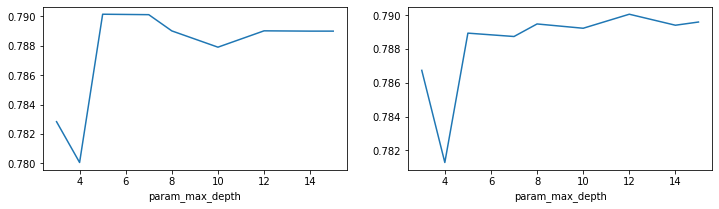

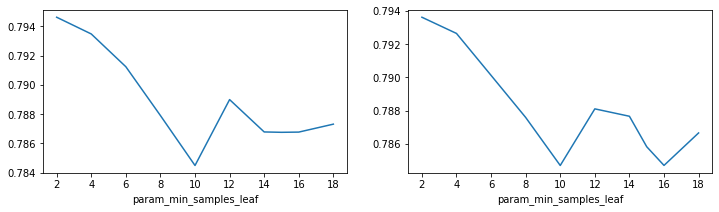

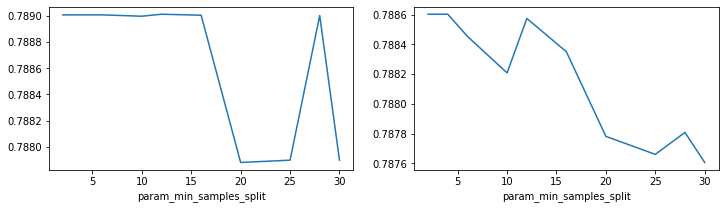

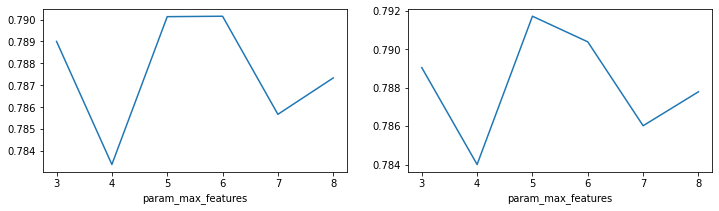

In [73]:
for ind, col in enumerate(params.keys()):
  plt.figure(figsize=[12,3])
  plt.subplot(1,2,1)
  score_df.groupby('param_'+col)['mean_test_score'].agg(np.median).plot()
  plt.subplot(1,2,2)
  score_df.groupby('param_'+col)['mean_test_score'].mean().plot()
  plt.show()

In [74]:
params = {
    'max_depth': [5, 7, 8, 12],
    'min_samples_leaf': [2, 12],
    'min_samples_split': [2,4,5,6,10,12],
    'max_features': [3, 5, 6],
    #'n_estimators': [25,50,80,100], # for random forest
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=4, verbose=1, scoring = "accuracy")
grid_search.fit(X, y)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 576 out of 576 | elapsed:    4.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': [5, 7, 8, 12], 'max_features': [3, 5, 6],
   

In [76]:
score_df = pd.DataFrame(grid_search.cv_results_)
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf', 'rank_test_score',  'mean_test_score']
score_df.nlargest(5,"mean_test_score")[sel_cols]
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

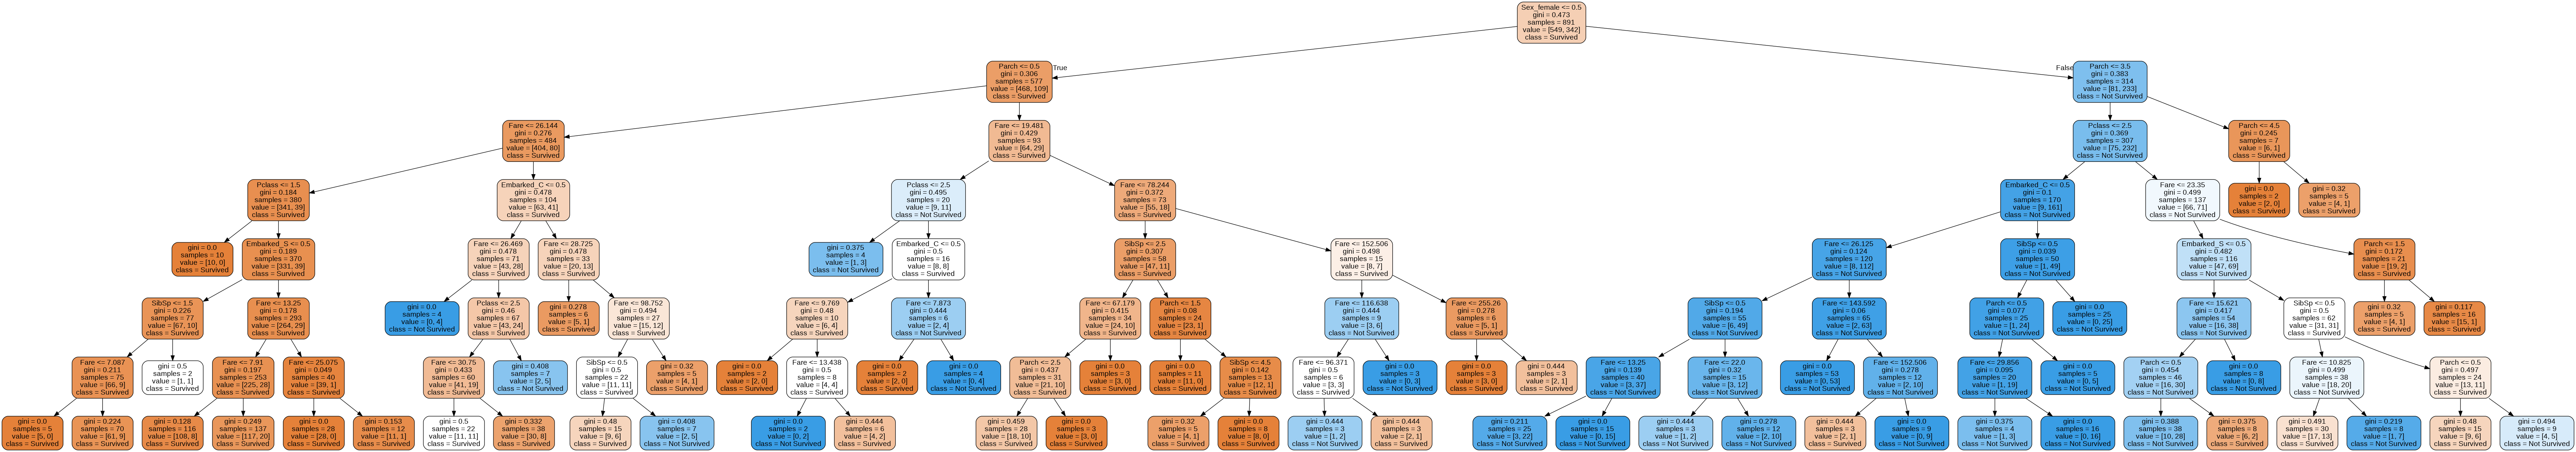

In [77]:
# Plotting Decision Tree using Graphviz
dot_data = export_graphviz(dt_best, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Survived', 'Not Survived'],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("titanic_decision_tree") # saves png file
Image(graph.render("titanic_decision_tree")) # shows png file

# Plotting decision tree using plot_tree
# fig = plt.figure(figsize=(60,30))
# _ = plot_tree(dt_best, feature_names = X.columns, class_names=['Survived', "Not Survived"], filled=True)

In [78]:
predictions = dt_best.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)